#Importing libraries and creating a dataframe.

In [0]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

#Reading CSV file.

In [0]:
df=pd.read_csv("Hackathon_Data_May6.csv")
df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01


#Collecting some information about the dataset.

In [0]:
df.columns

Index(['ParentSKU', 'Site Id', 'Year', 'Month', 'Category Name ID', 'Unit',
       'Qty', 'Price', 'Net Sales calculated', 'Cash Discount',
       'Amount to Customer', 'MRP', 'Pack Size', 'Pack Unit Id', 'State',
       'Zone', 'Master Category', 'Size', 'Rank', 'Date'],
      dtype='object')

In [0]:
df.describe()

,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Master Category,Rank
count,34950.000000,34950.000000,34950.000000,34950.000000,34950.000000,3.495000e+04,34950.000000,3.495000e+04,34950.000000,34950.000000,34950.000000,34950.000000
mean,2018.238369,6.592704,5.650329,648.123836,170.624435,6.820406e+04,0.828097,6.882029e+04,267.888050,105.565728,7.601373,27.729843
std,0.890129,3.480924,2.304732,1692.562838,151.156814,1.311879e+05,7.367449,1.316258e+05,229.221730,140.720941,4.108985,14.634914
min,2017.000000,1.000000,0.000000,1.000000,27.000000,2.800000e+01,0.000000,2.800000e+01,33.846154,1.000000,0.000000,1.000000
25%,2018.000000,4.000000,5.000000,113.000000,95.000000,1.524025e+04,0.000000,1.536900e+04,153.333333,40.000000,4.000000,15.000000
50%,2018.000000,7.000000,7.000000,275.000000,120.000000,3.379350e+04,0.000000,3.412550e+04,190.000000,80.000000,10.000000,28.000000
75%,2019.000000,10.000000,7.000000,616.000000,178.000000,7.255300e+04,0.000000,7.340275e+04,295.000000,100.000000,11.000000,41.000000
max,2020.000000,12.000000,8.000000,52226.000000,1023.000000,5.448294e+06,325.000000,5.448294e+06,1500.000000,700.000000,12.000000,52.000000


In [0]:
df.info

<bound method DataFrame.info of       ParentSKU     Site Id  Year  ...   Size  Rank        Date
0         F0033   AHMEDABAD  2017  ...   30gm     4  2017-04-01
1         F0033   AHMEDABAD  2017  ...   30gm     4  2017-05-01
2         F0033   AHMEDABAD  2017  ...   30gm     4  2017-06-01
3         F0033   AHMEDABAD  2017  ...   30gm     4  2017-07-01
4         F0033   AHMEDABAD  2017  ...   30gm     4  2017-08-01
...         ...         ...   ...  ...    ...   ...         ...
34945     T0270  VIJAYAWADA  2019  ...  120gm    44  2019-09-01
34946     T0270  VIJAYAWADA  2019  ...  120gm    44  2019-10-01
34947     T0270  VIJAYAWADA  2019  ...  120gm    44  2019-12-01
34948     T0270  VIJAYAWADA  2020  ...  120gm    44  2020-01-01
34949     T0270  VIJAYAWADA  2020  ...  120gm    44  2020-02-01

[34950 rows x 20 columns]>

In [0]:
df.shape

(34950, 20)

#Data Wrangling

In [0]:
x=df.duplicated(subset=None, keep='first')
print(x.shape)

(34950,)


In [0]:
df["Zone"]= df["Zone"].str.replace("West2", "WEST", case= False) 
df["Zone"]= df["Zone"].str.replace("West1", "WEST", case= False)
df["Zone"]= df["Zone"].str.replace("West", "WEST", case= False)
df["Zone"]= df["Zone"].str.replace("North 2", "NORTH", case= False)
df["Zone"]= df["Zone"].str.replace("North 1", "NORTH", case= False)
df["Zone"]= df["Zone"].str.replace("North1", "NORTH", case= False)
df["Zone"]= df["Zone"].str.replace("North2", "NORTH", case= False)
df["Zone"]= df["Zone"].str.replace("North", "NORTH", case= False)
df["Zone"]= df["Zone"].str.replace("east", "EAST", case= False)
df["Zone"]= df["Zone"].str.replace("south", "SOUTH", case= False)
df["Zone"]= df["Zone"].str.replace("South", "SOUTH", case= False)
df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-08-01


In [0]:
df.drop(['Unit', 'State'], axis = 1) 

,ParentSKU,Site Id,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,1621.0,54,82557,20,93640,80.0,30.0,GM,WEST,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,651.0,51,31473,21,35760,80.0,30.0,GM,WEST,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,457.0,46,19580,12,22293,70.0,30.0,GM,WEST,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,1985.0,41,78144,0,78144,70.0,30.0,GM,WEST,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,6.0,38,228,0,228,70.0,30.0,GM,WEST,3,30gm,4,2017-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,T0270,VIJAYAWADA,2019,9,1,1008.0,40,38321,0,38321,60.0,120.0,GM,SOUTH,5,120gm,44,2019-09-01
34946,T0270,VIJAYAWADA,2019,10,1,1179.0,40,44215,0,44215,60.0,120.0,GM,SOUTH,5,120gm,44,2019-10-01
34947,T0270,VIJAYAWADA,2019,12,1,81.0,40,2947,0,2947,60.0,120.0,GM,SOUTH,5,120gm,44,2019-12-01
34948,T0270,VIJAYAWADA,2020,1,1,580.0,40,21125,0,21125,60.0,120.0,GM,SOUTH,5,120gm,44,2020-01-01


In [0]:
TotalAmount = (df['Qty'] * df['MRP'])-df['Cash Discount']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [0]:
df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,TotalAmount,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,129660.0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,52059.0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,31978.0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,138950.0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,420.0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST,3,30gm,4,2017-08-01


#EDA (Exploratory Data Analysis)

1. TotalAmount of sales at each site, how many quantites sold at each site.

In [0]:
site_df = df.groupby(['Site Id']).sum()
site_df.sort_values('TotalAmount',ascending=False,inplace=True)
site_df[['Qty','TotalAmount']]

,Qty,TotalAmount
Site Id,,
DELMDK,3467907.00,5.958647e+08
MOHALI,2708360.00,4.503081e+08
MUMBAI,2128550.00,4.164727e+08
KOLKATA2,1728288.00,3.266175e+08
PUNE,1555476.00,2.618336e+08
LUCKNOW,1436727.00,2.346728e+08
BANGALORE,980430.00,2.066048e+08
AHMEDABAD,786735.00,1.563694e+08
GHAZIABAD,990572.00,1.537714e+08


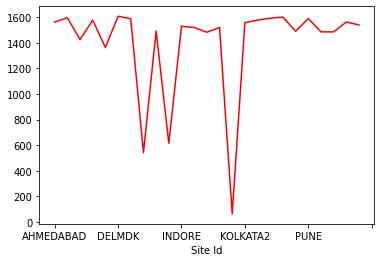

In [0]:
df.groupby('Site Id')['TotalAmount'].count().plot.line(color = 'r')

2. Total Amount of revenue generated in each year, how many quantities sold yearly.

In [0]:
year_df = df.groupby(['Year']).sum()
year_df.sort_values('TotalAmount',ascending=False,inplace=True)
year_df[['Qty','TotalAmount']]

,Qty,TotalAmount
Year,,
2018,8318639.48,1.385371e+09
2019,7479698.00,1.324243e+09
2017,5280299.60,9.935667e+08
2020,1573291.00,3.098898e+08


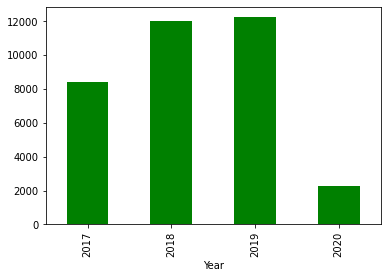

In [0]:
df.groupby('Year')['Qty'].count().plot.bar(color = 'g')

3. Total Amount of revenue generated in each Zone, how many quantites sold in a particular Zone.

In [0]:
zonal_df = df.groupby(['Zone']).sum()
zonal_df.sort_values('TotalAmount',ascending=False,inplace=True)
zonal_df[['Qty','TotalAmount']]

,Qty,TotalAmount
Zone,,
NORTH,10641730.00,1.764618e+09
WEST,5350009.00,9.923688e+08
EAST,3990094.00,6.923784e+08
SOUTH,2670095.08,5.637051e+08


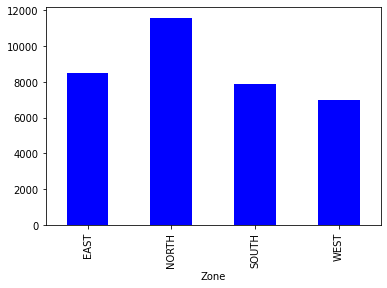

In [0]:
df.groupby('Zone')['Qty'].count().plot.bar(color = 'b')

4. Top revenue contributing products.

In [0]:
cat_df = df.groupby(['Category Name ID']).sum()
cat_df.sort_values('TotalAmount',ascending=False,inplace=True)
cat_df[['Qty','TotalAmount']]

,Qty,TotalAmount
Category Name ID,,
7,10141789.00,1.798281e+09
6,2119728.48,6.986864e+08
4,1212414.00,5.216511e+08
0,6560574.60,4.296633e+08
1,1426155.00,2.368727e+08
3,132927.00,1.760934e+08
8,131646.00,7.068371e+07
2,894184.00,6.396834e+07
5,32510.00,1.717064e+07


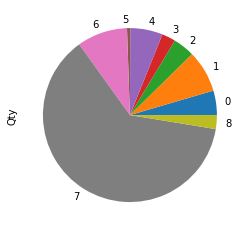

In [0]:
df.groupby('Category Name ID')['Qty'].count().plot.pie()

In [0]:
mst_df = df.groupby(['Master Category']).sum()
mst_df.sort_values('TotalAmount',ascending=False,inplace=True)
mst_df[['Qty','TotalAmount']]

,Qty,TotalAmount
Master Category,,
11,6095066.00,1.119761e+09
10,2138170.48,7.064090e+08
8,1193972.00,5.139285e+08
3,6560574.60,4.296633e+08
1,2257171.00,2.242665e+08
12,884839.00,2.089402e+08
4,675764.00,1.976621e+08
7,132927.00,1.760934e+08
0,456962.00,1.677575e+08


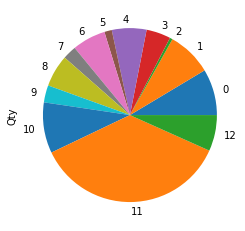

In [0]:
df.groupby('Master Category')['Qty'].count().plot.pie()

5. Trend of Discounts on products on Parent Stock Keeping Unit.

In [0]:
cat_df = df.groupby(['ParentSKU']).sum()
cat_df.sort_values('Cash Discount',ascending=False,inplace=True)
cat_df[['Cash Discount']]

,Cash Discount
ParentSKU,
F0307,1517
F0033,1293
F0215,1240
F0328,1209
F0034,1156
F0216,1133
F0311,1095
F0306,1080
F0217,1020


6. Discount applied categorically.

In [0]:
cat_df = df.groupby(['Master Category']).sum()
cat_df.sort_values('Cash Discount',ascending=False,inplace=True)
cat_df[['Cash Discount','TotalAmount']]

,Cash Discount,TotalAmount
Master Category,,
11,10861,1.119761e+09
10,3199,7.064090e+08
12,3095,2.089402e+08
0,3037,1.677575e+08
3,2449,4.296633e+08
6,2449,1.313117e+08
4,2179,1.976621e+08
9,1011,8.785435e+07
8,662,5.139285e+08


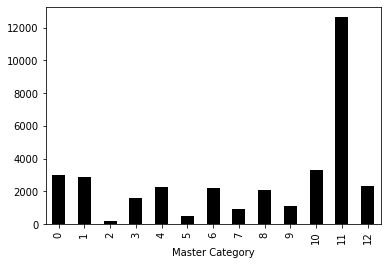

In [0]:
df.groupby('Master Category')['Cash Discount'].count().plot.bar(color='black')

7. Analysis of amounts to customer categorically.

In [0]:
cat_df = df.groupby(['Master Category']).sum()
cat_df.sort_values('Net Sales calculated',ascending=False,inplace=True)
cat_df[['Net Sales calculated']]

,Net Sales calculated
Master Category,
11,678226315
10,397386913
8,308116312
3,256272941
1,131106560
12,126467838
4,116733127
7,105806825
0,102737973


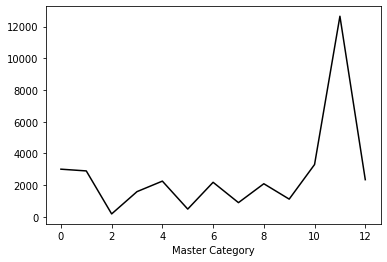

In [0]:
df.groupby('Master Category')['Net Sales calculated'].count().plot.line(color='black')

8. Total Amount billed by customer categorically.

In [0]:
cat_df = df.groupby(['Master Category']).sum()
cat_df.sort_values('Amount to Customer',ascending=False,inplace=True)
cat_df[['Amount to Customer']]

,Amount to Customer
Master Category,
11,686598864
10,401208964
8,308395506
3,258770537
1,131106560
12,128578934
4,117738202
7,105806825
0,104282165


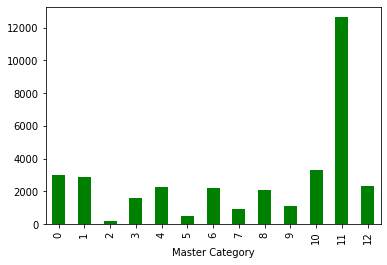

In [0]:
df.groupby('Master Category')['Amount to Customer'].count().plot.bar(color='g')

9. Sales analysis Zonal wise.

In [0]:
z_df = df.groupby(['Zone']).sum()
z_df.sort_values('Net Sales calculated',ascending=False,inplace=True)
z_df[['Net Sales calculated']]

,Net Sales calculated
Zone,
NORTH,1048404045
WEST,586261794
EAST,414579530
SOUTH,334486417


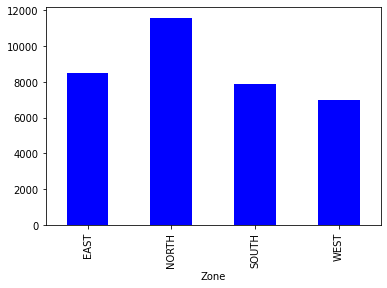

In [0]:
df.groupby('Zone')['Net Sales calculated'].count().plot.bar(color='b')

10. Amount billed by customer's trend on different sites.

In [0]:
s_df = df.groupby(['Site Id']).sum()
s_df.sort_values('Amount to Customer',ascending=False,inplace=True)
s_df[['Amount to Customer']]

,Amount to Customer
Site Id,
DELMDK,357937484
MOHALI,268500541
MUMBAI,245649856
KOLKATA2,198449700
PUNE,157949686
LUCKNOW,140550809
BANGALORE,122664543
GHAZIABAD,92705516
AHMEDABAD,92671879


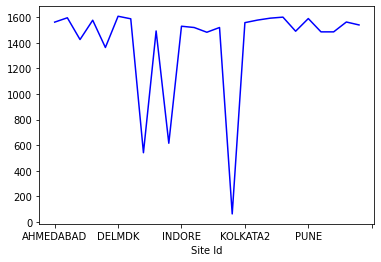

In [0]:
df.groupby('Site Id')['Amount to Customer'].count().plot.line(color='b')

#Conclusion

In this whole dataset I had initialy observed the data thoroughly then did data wrangling. Then I did exploratory data analysis (EDA) through which I had drawn some insights through it like trends of sales categorically and over particular site. Which zone having maximum and minimum sales. what are amounts to be billed by customers in different zones and sites. What are the net sales, what are the total amount and many more things. The main objective was "To turn data into information, and information into insight" which I had successfully achieved.